# Feature Engineering

In [1]:
# Import dependencies
import os
from pathlib import Path
import numpy as np
import pandas as pd

from pyAudioAnalysis import audioBasicIO, ShortTermFeatures

import matplotlib.pyplot as plt
import librosa
import librosa.display
from tqdm import tqdm
import tensorflow as tf
from keras.preprocessing.image import img_to_array
from PIL import Image as pil_Image
from IPython.display import display, Image
import json

%run functions.ipynb

In [2]:
# Retrieve the audio files
audio_path = "../resources/audio_files/"
audio_files = os.listdir(audio_path)

# Ignore duplicates
duplicates = ['voice005.wav', 'voice006.wav', 'voice054.wav', 'voice055.wav']

## Short Term Features

In [3]:
# Initialise a list to hold feature dictionaries
st_features_list = []

# Define the frame size and step (msecs) - 50% overlap
window_length = 0.050
hop_size = 0.025

# Loop through each audio file
for file in tqdm(audio_files, "Extracting short term features"):

    # Only read .wav files
    if (file.endswith(".wav")) and (file not in duplicates):

        # Create a dictionary to hold features
        st_features = dict()

        # Get the ID
        voice_id = file.split(".")[0]

        # Load the file
        fs, signal_data = audioBasicIO.read_audio_file(audio_path + file)

        # Extract the features
        features, feature_names = ShortTermFeatures.feature_extraction(
            signal_data,
            fs,
            window_length * fs,
            hop_size * fs
        )

        # Populate the dictionary
        st_features['id'] = voice_id

        # Loop through the features
        for feature, name in zip(features, feature_names):

            # Convert spaces to underscore in name
            clean_name = name.replace("_", "").replace(" ", "")

            # Add each feature to the dictionary
            st_features[clean_name] = feature

        # Append the dictionary to the list
        st_features_list.append(st_features)

# Convert to a dataframe
st_features_df = pd.DataFrame(st_features_list)
st_features_df.head()

Extracting short term features: 100%|█████████| 209/209 [00:08<00:00, 24.07it/s]


,id,zcr,energy,energyentropy,spectralcentroid,spectralspread,spectralentropy,spectralflux,spectralrolloff,mfcc1,...,deltachroma4,deltachroma5,deltachroma6,deltachroma7,deltachroma8,deltachroma9,deltachroma10,deltachroma11,deltachroma12,deltachromastd
0,voice094,"[0.0, 0.0, 0.0, 0.11027568922305764, 0.2932330...","[6.036956937561178e-07, 6.036956937561178e-07,...","[3.3219280948856316, 3.3219280948856316, 3.321...","[0.005000000000000018, 0.005000000000000018, 0...","[3.2557795197439587e-09, 3.2557795197439587e-0...","[1.3265869665663234e-10, 1.3265869665663234e-1...","[0.0, 0.0, 0.0, 0.9823966482484221, 0.00275064...","[0.0, 0.0, 0.0, 0.83, 0.82, 0.8, 0.8, 0.795, 0...","[-99.0018044569324, -99.0018044569324, -99.001...",...,"[0.0, 0.0, 0.0, 0.0027544917481623883, 0.00171...","[0.0, 0.0, 0.0, 0.00532080246284421, -0.002526...","[0.0, 0.0, 0.0, 0.0039407474502982836, -0.0001...","[0.0, 0.0, 0.0, 0.013393959774498507, -0.00565...","[0.0, 0.0, 0.0, 0.003022295285690943, 0.000637...","[0.0, 0.0, 0.0, 0.0029404764262557343, 0.00105...","[0.0, 0.0, 0.0, 0.012791614628449672, 0.041045...","[0.0, 0.0, 0.0, 0.014760672033384922, 0.001083...","[0.0, 0.0, 0.0, 0.005314421849018831, -0.00443...","[0.0, 0.0, 0.0, -0.04958891442584305, 0.008326..."
1,voice080,"[0.0, 0.0, 0.0, 0.06015037593984962, 0.1604010...","[6.725083325735506e-07, 6.725083325735506e-07,...","[3.321928094885808, 3.321928094885808, 3.32192...","[0.004999999999999999, 0.004999999999999999, 0...","[8.88178419700125e-19, 8.88178419700125e-19, 8...","[1.1908465736187648e-10, 1.1908465736187648e-1...","[0.0, 0.0, 0.0, 0.9994814676223645, 0.00566532...","[0.0, 0.0, 0.0, 0.355, 0.34, 0.345, 0.345, 0.3...","[-99.00180475419432, -99.00180475419432, -99.0...",...,"[0.0, 0.0, 0.0, 0.009700124142185344, -0.00230...","[0.0, 0.0, 0.0, 0.005302947095685554, -0.00335...","[0.0, 0.0, 0.0, 0.004176133080768391, -0.00149...","[0.0, 0.0, 0.0, 0.01649277734326786, -0.013773...","[0.0, 0.0, 0.0, 0.01660802640039016, -0.011421...","[0.0, 0.0, 0.0, 0.029250508744550208, 0.059908...","[0.0, 0.0, 0.0, 0.021764092159619556, -1.95623...","[0.0, 0.0, 0.0, 0.015624512862529279, 0.001762...","[0.0, 0.0, 0.0, 0.0043743300147374205, -0.0036...","[0.0, 0.0, 0.0, -0.047609369636007995, 0.01621..."
2,voice057,"[0.0, 0.0, 0.0, 0.03007518796992481, 0.1102756...","[3.999052524692604e-07, 3.999052524692604e-07,...","[3.321928094884751, 3.321928094884751, 3.32192...","[0.005000000000000011, 0.005000000000000011, 0...","[2.5518505225999377e-09, 2.5518505225999377e-0...","[2.002612468441392e-10, 2.002612468441392e-10,...","[0.0, 0.0, 0.0, 1.0034464485520185, 0.00921859...","[0.0, 0.0, 0.0, 0.19, 0.195, 0.19, 0.18, 0.18,...","[-99.00180460556335, -99.00180460556335, -99.0...",...,"[0.0, 0.0, 0.0, 0.015508486456250989, -0.01190...","[0.0, 0.0, 0.0, 0.018390024663314568, 0.028770...","[0.0, 0.0, 0.0, 0.019171803974693716, -0.00841...","[0.0, 0.0, 0.0, 0.026982139863539388, -0.00534...","[0.0, 0.0, 0.0, 0.021438500347018444, 0.009747...","[0.0, 0.0, 0.0, 0.025872793439917253, -0.02343...","[0.0, 0.0, 0.0, 0.013803645582255043, -0.01232...","[0.0, 0.0, 0.0, 0.011713748592890092, 0.005227...","[0.0, 0.0, 0.0, 0.007547145369114183, 0.015877...","[0.0, 0.0, 0.0, -0.04901123008818458, 0.007792..."
3,voice043,"[0.0, 0.0, 0.0, 0.040100250626566414, 0.142857...","[4.083981747468871e-06, 4.083981747468871e-06,...","[3.321928094887106, 3.321928094887106, 3.32192...","[0.005000000000000086, 0.005000000000000086, 0...","[6.88245926915698e-09, 6.88245926915698e-09, 6...","[1.9609455000319366e-11, 1.9609455000319366e-1...","[0.0, 0.0, 0.0, 1.0085128980345335, 0.00581937...","[0.0, 0.0, 0.0, 0.36, 0.4, 0.4, 0.405, 0.405, ...","[-99.0018002879784, -99.0018002879784, -99.001...",...,"[0.0, 0.0, 0.0, 0.008849248263421644, -0.00670...","[0.0, 0.0, 0.0, 0.0022333229844260956, -0.0013...","[0.0, 0.0, 0.0, 0.009585981074710547, -0.00687...","[0.0, 0.0, 0.0, 0.012288791325093633, -0.00972...","[0.0, 0.0, 0.0, 0.0024019208321958262, -0.0017..

In [4]:
# Convert each feature column to its own dataframe

# Get a list of all the features
feature_names = [name.replace(" ", "_") for name in feature_names]

# Initialise dictionary to hold all the dataframes
dataframes = dict()

# Get a list of all the voice IDs
voice_ids = list(st_features_df['id'])

# Loop through each feature
for feature in st_features_df:

    # Create a new dataframe
    feat_df = pd.DataFrame(list(st_features_df[feature]))
    
    # Add the voice_ids as a column
    feat_df['id'] = voice_ids

    # Move as the first column
    id_col = feat_df['id']
    feat_df.drop(columns=['id'], inplace=True)
    feat_df.insert(0, 'id', id_col)

    # Pad short arrays with '0'
    feat_df = feat_df.fillna(0)

    # Append to the dataframes dictionary
    dataframes[feature] = feat_df

# Check one dataframe
dataframes['mfcc1'].head()

,id,0,1,2,3,4,5,6,7,8,...,182,183,184,185,186,187,188,189,190,191
0,voice094,-99.001804,-99.001804,-99.001804,-30.126680,-28.207739,-26.742718,-26.036279,-25.966856,-25.172679,...,-24.734984,-24.676406,-24.341257,-24.206070,-24.641155,-24.918676,-24.651015,0.0,0.0,0.0
1,voice080,-99.001805,-99.001805,-99.001805,-25.511861,-24.167703,-23.375575,-23.276032,-22.695472,-22.655148,...,-22.042955,-21.945921,-21.976212,-22.197801,-22.455680,-22.209268,-21.204513,0.0,0.0,0.0
2,voice057,-99.001805,-99.001805,-99.001805,-26.400714,-24.558688,-23.938359,-23.657458,-23.292070,-22.897761,...,-23.437463,-23.426851,-23.212419,-23.472999,-23.286896,-22.969931,-22.322626,0.0,0.0,0.0
3,voice043,-99.001800,-99.001800,-99.001800,-26.289723,-24.944728,-24.510041,-23.166485,-22.581124,-23.044387,...,-23.670267,-22.957917,-23.242655,-22.657681,-21.958997,-21.655121,-21.867774,0.0,0.0,0.0
4,voice123,-99.001804,-99.001804,-99.001804,-27.708013,-25.038148,-23.889743,-23.252275,-22.890114,-22.348272,...,-24.117779,-24.493998,-24.702198,-25.039760,-24.665371,-24.244117,-23.650985,0.0,0.0,0.0


In [5]:
# Delete the 'id' dataframe
del dataframes['id']

# Confirm the existing dataframes
list(dataframes.keys())

['zcr',
 'energy',
 'energyentropy',
 'spectralcentroid',
 'spectralspread',
 'spectralentropy',
 'spectralflux',
 'spectralrolloff',
 'mfcc1',
 'mfcc2',
 'mfcc3',
 'mfcc4',
 'mfcc5',
 'mfcc6',
 'mfcc7',
 'mfcc8',
 'mfcc9',
 'mfcc10',
 'mfcc11',
 'mfcc12',
 'mfcc13',
 'chroma1',
 'chroma2',
 'chroma3',
 'chroma4',
 'chroma5',
 'chroma6',
 'chroma7',
 'chroma8',
 'chroma9',
 'chroma10',
 'chroma11',
 'chroma12',
 'chromastd',
 'deltazcr',
 'deltaenergy',
 'deltaenergyentropy',
 'deltaspectralcentroid',
 'deltaspectralspread',
 'deltaspectralentropy',
 'deltaspectralflux',
 'deltaspectralrolloff',
 'deltamfcc1',
 'deltamfcc2',
 'deltamfcc3',
 'deltamfcc4',
 'deltamfcc5',
 'deltamfcc6',
 'deltamfcc7',
 'deltamfcc8',
 'deltamfcc9',
 'deltamfcc10',
 'deltamfcc11',
 'deltamfcc12',
 'deltamfcc13',
 'deltachroma1',
 'deltachroma2',
 'deltachroma3',
 'deltachroma4',
 'deltachroma5',
 'deltachroma6',
 'deltachroma7',
 'deltachroma8',
 'deltachroma9',
 'deltachroma10',
 'deltachroma11',
 'deltach

In [6]:
# Loop through each feature_df in dataframes
for df in dataframes:

    # Rename the columns
    new_cols = [f'{df}_{col}' for col in dataframes[df].columns if col != 'id']

    # Add 'id' back to the list
    new_cols.insert(0, 'id')
    
    # Update the column names
    dataframes[df].columns = new_cols

    # Export to a CSV
    dataframes[df].to_csv(
        f'../resources/clean_data/stfeatures/{df}.csv',
        encoding = 'utf8',
        index = False
    )

# Check one dataframe
dataframes['mfcc1'].head()

,id,mfcc1_0,mfcc1_1,mfcc1_2,mfcc1_3,mfcc1_4,mfcc1_5,mfcc1_6,mfcc1_7,mfcc1_8,...,mfcc1_182,mfcc1_183,mfcc1_184,mfcc1_185,mfcc1_186,mfcc1_187,mfcc1_188,mfcc1_189,mfcc1_190,mfcc1_191
0,voice094,-99.001804,-99.001804,-99.001804,-30.126680,-28.207739,-26.742718,-26.036279,-25.966856,-25.172679,...,-24.734984,-24.676406,-24.341257,-24.206070,-24.641155,-24.918676,-24.651015,0.0,0.0,0.0
1,voice080,-99.001805,-99.001805,-99.001805,-25.511861,-24.167703,-23.375575,-23.276032,-22.695472,-22.655148,...,-22.042955,-21.945921,-21.976212,-22.197801,-22.455680,-22.209268,-21.204513,0.0,0.0,0.0
2,voice057,-99.001805,-99.001805,-99.001805,-26.400714,-24.558688,-23.938359,-23.657458,-23.292070,-22.897761,...,-23.437463,-23.426851,-23.212419,-23.472999,-23.286896,-22.969931,-22.322626,0.0,0.0,0.0
3,voice043,-99.001800,-99.001800,-99.001800,-26.289723,-24.944728,-24.510041,-23.166485,-22.581124,-23.044387,...,-23.670267,-22.957917,-23.242655,-22.657681,-21.958997,-21.655121,-21.867774,0.0,0.0,0.0
4,voice123,-99.001804,-99.001804,-99.001804,-27.708013,-25.038148,-23.889743,-23.252275,-22.890114,-22.348272,...,-24.117779,-24.493998,-24.702198,-25.039760,-24.665371,-24.244117,-23.650985,0.0,0.0,0.0


## Spectrograms

In [7]:
# Create the spectrograms
for file in tqdm(audio_files, desc="Creating spectrograms"):
    
    # Only read .wav files
    if (file.endswith(".wav")) and (file not in duplicates):
        
        # Load the file
        y, sr = librosa.load(
            audio_path + file, # full file path
            sr = None # preserve sampling rate
        )

        # Plot the spectrogram
        D = librosa.amplitude_to_db(
            np.abs(librosa.stft(y)),
            ref = np.max
        )

        # Plot the spectrogram
        librosa.display.specshow(
            D,
            sr = sr,
            x_axis = 'time',
            y_axis = 'linear' # can also choose: linear
        )
        
        # Define the filename
        filename = file.split(".")[0]

        # Remove labels and border
        plt.tight_layout()
        plt.axis('off')
        
        # Export image
        plt.savefig(
            f'../resources/spectrograms/linear/{filename}.png',
            bbox_inches = 'tight',
            pad_inches = 0
        )
        
        # Close the figure to avoid runtime warning
        plt.close()

Creating spectrograms: 100%|██████████████████| 209/209 [00:15<00:00, 13.22it/s]


### Resize Spectrograms

In [8]:
# Define the image path and files
image_path = "../resources/spectrograms/linear/"
image_files = os.listdir(image_path)

In [9]:
# Original run
resize_option(
    new_width = 305,
    new_height = 225,
    input_dir_path = image_path,
    output_dir_name = 'linear_resize'
)

Resizing spectrograms (linear_resize): 100%|██| 205/205 [00:09<00:00, 20.82it/s]


In [10]:
# AlexNET - 227 px
resize_option(
    new_width = 293,
    new_height = 293,
    input_dir_path = image_path,
    output_dir_name = 'alex_resize'
)

Resizing spectrograms (alex_resize): 100%|████| 205/205 [00:11<00:00, 18.44it/s]


### Convert Spectrograms to CSV

In [11]:
# Original run
spec_to_csv(
    original_path = "../resources/spectrograms/linear_resize/",
    output_name = ""
)

Exporting as CSV (): 4it [00:40, 10.08s/it]


In [12]:
# AlexNET
spec_to_csv(
    original_path = "../resources/spectrograms/alex_resize/",
    output_name = "alex"
)

Exporting as CSV (alex): 4it [00:54, 13.61s/it]


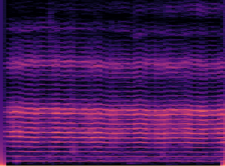

In [13]:
# Check the resized voice001.png
check_img_path = '../resources/spectrograms/linear_resize/voice001.png'

# Display the image
display(Image(filename=check_img_path))